In [1]:
import os
os.getcwd()
data_path = os.path.join(os.getcwd(), '/kaggle/input/doublemnist/double_mnist')

print(data_path)

/kaggle/input/doublemnist/double_mnist


### 3.1 Data Loading and Preprocessing

In [2]:
import cv2
import numpy as np

data_path = os.path.join(os.getcwd(), '/kaggle/input/doublemnist/double_mnist')

print(os.listdir('/kaggle/input/doublemnist/double_mnist'))

def load_mnist_data(data_path):
    
    def one_hot_encode(label_str):
        one_hot = np.zeros(33)
        
        for i in range(3):  
            start_index = i * 11
            if i < len(label_str):
                digit = int(label_str[i])
                one_hot[start_index + digit + 1] = 1  # Presence of a digit
            else:
                one_hot[start_index] = 1  # Absence of a digit

        return one_hot
    
    def load_images_from_folder(folder):
        images = []
        labels = []
        for foldername in sorted(os.listdir(folder)):
            subfolder_path = os.path.join(folder, foldername)
            for filename in sorted(os.listdir(subfolder_path)):
                if filename.endswith('.png'):
                    file_path = os.path.join(subfolder_path, filename)
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    images.append(img)
                    one_hot_label = one_hot_encode(foldername)
                    labels.append(one_hot_label)
                    
        return images, labels

    train_images, train_labels = load_images_from_folder(os.path.join(data_path, 'train'))
    val_images, val_labels = load_images_from_folder(os.path.join(data_path, 'val'))
    test_images, test_labels = load_images_from_folder(os.path.join(data_path, 'test'))
    print(train_labels[0])
    train_data = list(zip(train_images, train_labels))
    val_data = list(zip(val_images, val_labels))
    test_data = list(zip(test_images, test_labels))
    
    return train_data, val_data, test_data

train_data, val_data, test_data = load_mnist_data(data_path)

print(f"Train set size: {len(train_data)} images")
print(f"Validation set size: {len(val_data)} images")
print(f"Test set size: {len(test_data)} images")


['val', 'test', 'train']
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Train set size: 12600 images
Validation set size: 3000 images
Test set size: 4600 images


In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import torch

class MNISTDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform if transform is not None else self.default_transform()
    
    def default_transform(self):
        return transforms.Compose([
            transforms.Normalize(mean=[0.5], std=[0.5]),
        ])
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image, label = self.data[idx]
        
        # Convert to torch tensor and normalize to [0, 1]
        image = torch.FloatTensor(image).unsqueeze(0) / 255.0
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.long)

def create_dataloaders(data_path, batch_size=32, num_workers=4):
    """
    Create train, validation and test dataloaders
    """
    # Load the data
    train_data, val_data, test_data = load_mnist_data(data_path)
    
    # Define transformations
    transform = transforms.Compose([
        transforms.Normalize(mean=[0.5], std=[0.5]),
        # You could add more transforms here if needed:
        # transforms.RandomRotation(10),
        # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    ])
    
    # Create datasets
    train_dataset = MNISTDataset(train_data, transform=transform)
    val_dataset = MNISTDataset(val_data, transform=transform)
    test_dataset = MNISTDataset(test_data, transform=transform)
    
    
    
    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )
    
    return train_loader, val_loader, test_loader

def create_dataloaders(data_path, batch_size=32, num_workers=4):
    """
    Create train, validation and test dataloaders
    """
    # Load the data
    train_data, val_data, test_data = load_mnist_data(data_path)
    
    # Define transformations
    transform = transforms.Compose([
        transforms.Normalize(mean=[0.5], std=[0.5]),
        # You could add more transforms here if needed:
        # transforms.RandomRotation(10),
        # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    ])
    
    # Create datasets
    train_dataset = MNISTDataset(train_data, transform=transform)
    val_dataset = MNISTDataset(val_data, transform=transform)
    test_dataset = MNISTDataset(test_data, transform=transform)
    
    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available()
    )
    
    return train_loader, val_loader, test_loader

data_path = os.path.join(os.getcwd(), '/kaggle/input/doublemnist/double_mnist')

train_loader, val_loader, test_loader = create_dataloaders(
    data_path,
    batch_size=32,
    num_workers=4
)

print(f"\nDataset sizes:")
print(f"Train loader: {len(train_loader.dataset)} images, {len(train_loader)} batches")
print(f"Validation loader: {len(val_loader.dataset)} images, {len(val_loader)} batches")
print(f"Test loader: {len(test_loader.dataset)} images, {len(test_loader)} batches")

for images, labels in train_loader:
#         print(images[0])
    print(f"\nBatch shapes:")
    print(f"Images: {images.shape}")
    print(f"Labels: {labels.shape}") 
    break    

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Dataset sizes:
Train loader: 12600 images, 394 batches
Validation loader: 3000 images, 94 batches
Test loader: 4600 images, 144 batches

Batch shapes:
Images: torch.Size([32, 1, 128, 128])
Labels: torch.Size([32, 33])


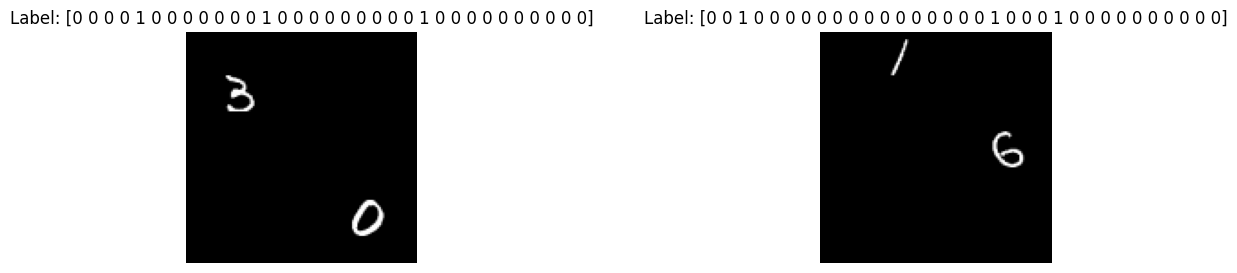

In [4]:
import matplotlib.pyplot as plt

def plot_images_with_labels(data_loader, num_images=10):

    images, labels = next(iter(data_loader))
    
    images = images[:num_images].squeeze().numpy()
    labels = labels[:num_images].numpy()

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

plot_images_with_labels(train_loader, num_images=2)

### 3.2 The Multi-Label CNN implementation

The changes are mainly the loss which function which changes to BCEwithLogitsLoss and an additional sigmoid layer which takes care of outputing probabilites for thresholding at 0.5 to classify into that digit.(So yes it requires final activation layer after the Linear layer just like the MLP in the last assignment). I have used sigmoid because its between 0 and 1 and its a good activation to ouput probabilites due to its shape between 0 and 1.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, hamming_loss
import numpy as np

class CNN(nn.Module):
    def __init__(self, learning_rate=0.001, dropout_rate=0.2, num_conv_layers=3, optimizer_name='adam', num_classes=33):
        super(CNN, self).__init__()

        self.num_classes = num_classes  
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.num_conv_layers = num_conv_layers
        self.optimizer_name = optimizer_name 
        self.current_size = 128

        layers = []
        in_channels = 1  
        out_channels = 33

        for _ in range(num_conv_layers):
            layers += [
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Dropout(dropout_rate)
            ]
            in_channels = out_channels
            out_channels *= 2
            self.current_size = self.current_size // 2

        self.conv = nn.Sequential(*layers)

        self.flat_features = in_channels * (self.current_size ** 2)

        self.fc = nn.Sequential(
            nn.Linear(self.flat_features, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, self.num_classes) 
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # Flatten
        return self.fc(x)

    def compile_model(self):
        if self.optimizer_name == 'adam':
            return optim.Adam(self.parameters(), lr=self.learning_rate)
        elif self.optimizer_name == 'sgd':
            return optim.SGD(self.parameters(), lr=self.learning_rate)
        else:
            raise ValueError("Optimizer not supported")

    def train_model(self, train_loader, val_loader, num_epochs=20, device='cpu'):
        criterion = nn.BCEWithLogitsLoss()
        optimizer = self.compile_model()
        self.to(device)

        train_losses, val_losses = [], []

        for epoch in range(num_epochs):
            self.train()
            epoch_train_loss = 0.0

            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device).float()
                optimizer.zero_grad()
                outputs = self(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_train_loss += loss.item()

            # Validation phase
            self.eval()
            epoch_val_loss = 0.0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device).float()
                    outputs = self(images)
                    loss = criterion(outputs, labels)
                    epoch_val_loss += loss.item()

            avg_train_loss = epoch_train_loss / len(train_loader)
            avg_val_loss = epoch_val_loss / len(val_loader)
            train_losses.append(avg_train_loss)
            val_losses.append(avg_val_loss)

            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

        # Final metrics after all epochs
        final_metrics = self.evaluate_metrics(val_loader, device)
        return final_metrics

    def evaluate_metrics(self, data_loader, device):
        self.eval()
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in data_loader:
                images, labels = images.to(device), labels.to(device).float()
                outputs = self(images)

                # Apply sigmoid and threshold
                probabilities = torch.sigmoid(outputs)
                predictions = (probabilities > 0.5).int()  # Threshold at 0.5
                all_preds.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Calculate Hamming score
        hamming = 1 - hamming_loss(all_labels, all_preds)  # 1 - hamming_loss to get the score

        # Calculate Exact Match Accuracy (Strict accuracy)
        exact_match_accuracy = accuracy_score(all_labels, all_preds)

        return {
            'hamming_score': hamming,
            'exact_match_accuracy': exact_match_accuracy
        }

# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

# Assuming train_loader and val_loader are defined
metrics = model.train_model(
    train_loader=train_loader,
    val_loader=val_loader,
    device=device
)
print(metrics)
# Display the final metrics
print("Final Metrics after training:")
for metric, value in metrics.items():
    print(f"{metric.replace('_', ' ').capitalize()}: {value:.4f}")


Epoch [1/20], Train Loss: 0.2259, Val Loss: 0.2261
Epoch [2/20], Train Loss: 0.1888, Val Loss: 0.1993
Epoch [3/20], Train Loss: 0.1556, Val Loss: 0.1708
Epoch [4/20], Train Loss: 0.1275, Val Loss: 0.1507
Epoch [5/20], Train Loss: 0.1088, Val Loss: 0.1464
Epoch [6/20], Train Loss: 0.0952, Val Loss: 0.1347
Epoch [7/20], Train Loss: 0.0838, Val Loss: 0.1261
Epoch [8/20], Train Loss: 0.0732, Val Loss: 0.1292
Epoch [9/20], Train Loss: 0.0653, Val Loss: 0.1247
Epoch [10/20], Train Loss: 0.0591, Val Loss: 0.1288
Epoch [11/20], Train Loss: 0.0543, Val Loss: 0.1240
Epoch [12/20], Train Loss: 0.0501, Val Loss: 0.1248
Epoch [13/20], Train Loss: 0.0464, Val Loss: 0.1224
Epoch [14/20], Train Loss: 0.0438, Val Loss: 0.1319
Epoch [15/20], Train Loss: 0.0413, Val Loss: 0.1254
Epoch [16/20], Train Loss: 0.0394, Val Loss: 0.1331
Epoch [17/20], Train Loss: 0.0376, Val Loss: 0.1337
Epoch [18/20], Train Loss: 0.0358, Val Loss: 0.1323
Epoch [19/20], Train Loss: 0.0353, Val Loss: 0.1377
Epoch [20/20], Train 

In [14]:
model.evaluate_metrics(test_loader,device)

{'hamming_score': 0.9688010540184453,
 'exact_match_accuracy': 0.22782608695652173}

In [6]:
import wandb
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()

my_secret = user_secrets.get_secret("wandb_api_key") 

wandb.login(key=my_secret)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### 3.3 Hyperparameter Tuning
The best performing model is the num_conv_layer = 3,learning_rate = 0.001,dropout_rate =0.2,epochs = 20,adam optimizer with a hammming output of 0.97 and exact match accuracy being 0.308

The training and validation loss plots are logged into wandb and the plot for the best loss graphs is below

![image](figures/image%20copy%207.png)

Trainig and validation lossfor the best configuration

![image](figures/image%20copy%208.png)

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import wandb
from sklearn.metrics import accuracy_score, hamming_loss
import matplotlib.pyplot as plt

class CNN(nn.Module):
    def __init__(self, learning_rate=0.001, dropout_rate=0.2, num_conv_layers=3, optimizer_name='adam', num_classes=33):
        super(CNN, self).__init__()
        
        # Initialize wandb config
        self.config = {
            'learning_rate': learning_rate,
            'dropout_rate': dropout_rate,
            'num_conv_layers': num_conv_layers,
            'optimizer_name': optimizer_name,
            'num_classes': num_classes
        }

        self.num_classes = num_classes  
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.num_conv_layers = num_conv_layers
        self.optimizer_name = optimizer_name 
        self.current_size = 128

        layers = []
        in_channels = 1  
        out_channels = 33

        for _ in range(num_conv_layers):
            layers += [
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Dropout(dropout_rate)
            ]
            in_channels = out_channels
            out_channels *= 2
            self.current_size = self.current_size // 2

        self.conv = nn.Sequential(*layers)
        self.flat_features = in_channels * (self.current_size ** 2)

        self.fc = nn.Sequential(
            nn.Linear(self.flat_features, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, self.num_classes) 
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

    def compile_model(self):
        if self.optimizer_name == 'adam':
            return optim.Adam(self.parameters(), lr=self.learning_rate)
        elif self.optimizer_name == 'sgd':
            return optim.SGD(self.parameters(), lr=self.learning_rate)
        else:
            raise ValueError("Optimizer not supported")

    def train_model(self, train_loader, val_loader, num_epochs=20, device='cpu'):
        criterion = nn.BCEWithLogitsLoss()
        optimizer = self.compile_model()
        self.to(device)

        # Log model architecture and hyperparameters
        wandb.watch(self, criterion, log="all", log_freq=100)

        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []

        for epoch in range(num_epochs):
            self.train()
            epoch_train_loss = 0.0
            correct_train = 0
            total_train = 0

            # Training loop
            for batch_idx, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device).float()
                optimizer.zero_grad()
                outputs = self(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                epoch_train_loss += loss.item()
                predictions = (torch.sigmoid(outputs) > 0.5).int()
                correct_train += (predictions == labels.int()).all(dim=1).sum().item()
                total_train += labels.size(0)

                # Log training metrics every 100 batches
                if batch_idx % 100 == 0:
                    wandb.log({
                        "batch": batch_idx,
                        "batch_loss": loss.item(),
                    })

            # Calculate training metrics
            avg_train_loss = epoch_train_loss / len(train_loader)
            train_accuracy = correct_train / total_train
            train_losses.append(avg_train_loss)
            train_accuracies.append(train_accuracy)

            # Validation phase
            self.eval()
            epoch_val_loss = 0.0
            correct_val = 0
            total_val = 0
            val_predictions = []
            val_true_labels = []

            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device).float()
                    outputs = self(images)
                    loss = criterion(outputs, labels)
                    epoch_val_loss += loss.item()

                    predictions = (torch.sigmoid(outputs) > 0.5).int()
                    correct_val += (predictions == labels.int()).all(dim=1).sum().item()
                    total_val += labels.size(0)

                    val_predictions.extend(predictions.cpu().numpy())
                    val_true_labels.extend(labels.cpu().numpy())

            # Calculate validation metrics
            avg_val_loss = epoch_val_loss / len(val_loader)
            val_accuracy = correct_val / total_val
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_accuracy)

            # Calculate Hamming score and exact match accuracy
            hamming_score = 1 - hamming_loss(val_true_labels, val_predictions)
            exact_match = accuracy_score(val_true_labels, val_predictions)

            # Log epoch metrics to wandb
            wandb.log({
                "epoch": epoch + 1,
                "train_loss": avg_train_loss,
                "val_loss": avg_val_loss,
                "train_accuracy": train_accuracy,
                "val_accuracy": val_accuracy,
                "hamming_score": hamming_score,
                "exact_match_accuracy": exact_match,
                "learning_rate": self.learning_rate
            })

            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

        # Get final evaluation metrics
        final_metrics = self.evaluate_metrics(val_loader, device)
        
        # Log final metrics to wandb
        wandb.log({
            "final_train_accuracy": train_accuracies[-1],
            "final_val_accuracy": val_accuracies[-1],
            "final_train_loss": train_losses[-1],
            "final_val_loss": val_losses[-1],
            "final_hamming_score": final_metrics['hamming_score'],
            "final_exact_match_accuracy": final_metrics['exact_match_accuracy']
        })

        return {
            'train_loss': train_losses,
            'val_loss': val_losses,
            'train_accuracy': train_accuracies,
            'val_accuracy': val_accuracies,
            **final_metrics
        }

    def evaluate_metrics(self, data_loader, device):
        self.eval()
        all_preds, all_labels = [], []

        with torch.no_grad():
            for images, labels in data_loader:
                images, labels = images.to(device), labels.to(device).float()
                outputs = self(images)
                predictions = (torch.sigmoid(outputs) > 0.5).int()
                all_preds.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        hamming = 1 - hamming_loss(all_labels, all_preds)
        exact_match_accuracy = accuracy_score(all_labels, all_preds)

        return {
            'hamming_score': hamming,
            'exact_match_accuracy': exact_match_accuracy
        }

def train_sweep():
    # Initialize wandb
    wandb.init()
    
    # Get hyperparameters from wandb config
    config = wandb.config
    
    # Initialize model with wandb config
    model = CNN(
        learning_rate=config.learning_rate,
        dropout_rate=config.dropout_rate,
        num_conv_layers=config.num_conv_layers,
        optimizer_name=config.optimizer,
        num_classes=33
    )
    
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Train model and get metrics
    metrics = model.train_model(
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=config.num_epochs,
        device=device
    )
    
    # Finish run
    wandb.finish()

# Sweep configuration
sweep_config = {
    'method': 'grid',
    'name': 'cnn-sweep',
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {'values': [0.001, 0.0001]},
        'num_epochs': {'values': [15,20]},
        'dropout_rate': {'values': [0.2]},
        'num_conv_layers': {'values': [2, 3]},
        'optimizer': {'values': ['adam', 'sgd']}
    }
}

# Initialize and run sweep
def run_sweep():
    wandb.login()
    sweep_id = wandb.sweep(sweep_config, project="CNN-Multi-Label-Classification")
    wandb.agent(sweep_id, train_sweep, count=16)
    
run_sweep()    

Create sweep with ID: awranga0
Sweep URL: https://wandb.ai/mjolnir65-iiit-hyderabad/CNN-Multi-Label-Classification/sweeps/awranga0


wandb: Agent Starting Run: 935q26rd with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 15
wandb: 	optimizer: adam


Epoch [1/15], Train Loss: 0.2324, Val Loss: 0.2317
Epoch [2/15], Train Loss: 0.1993, Val Loss: 0.2190
Epoch [3/15], Train Loss: 0.1904, Val Loss: 0.2179
Epoch [4/15], Train Loss: 0.1763, Val Loss: 0.2043
Epoch [5/15], Train Loss: 0.1630, Val Loss: 0.2018
Epoch [6/15], Train Loss: 0.1538, Val Loss: 0.1952
Epoch [7/15], Train Loss: 0.1419, Val Loss: 0.1944
Epoch [8/15], Train Loss: 0.1284, Val Loss: 0.1939
Epoch [9/15], Train Loss: 0.1150, Val Loss: 0.1901
Epoch [10/15], Train Loss: 0.1039, Val Loss: 0.1957
Epoch [11/15], Train Loss: 0.0940, Val Loss: 0.1942
Epoch [12/15], Train Loss: 0.0853, Val Loss: 0.2055
Epoch [13/15], Train Loss: 0.0783, Val Loss: 0.2111
Epoch [14/15], Train Loss: 0.0720, Val Loss: 0.2212
Epoch [15/15], Train Loss: 0.0673, Val Loss: 0.2240


batch,▁▃█▁▃▃▆█▆█▃▆█▁▃█▁▃▆█▃▆█▁▃▆█▁▃▆▃▆█▃▆▁▆▁▃█
batch_loss,█▃▂▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁▅▅▅▅▆▆▆▆▇▇█▇▇▇
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▅▆▇▂▄▁▃▃▅▆▅▆▆█


wandb: Agent Starting Run: yxyy0em6 with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 15
wandb: 	optimizer: sgd


Epoch [1/15], Train Loss: 0.4118, Val Loss: 0.2966
Epoch [2/15], Train Loss: 0.2798, Val Loss: 0.2726
Epoch [3/15], Train Loss: 0.2726, Val Loss: 0.2703
Epoch [4/15], Train Loss: 0.2703, Val Loss: 0.2706
Epoch [5/15], Train Loss: 0.2678, Val Loss: 0.2702
Epoch [6/15], Train Loss: 0.2667, Val Loss: 0.2701
Epoch [7/15], Train Loss: 0.2654, Val Loss: 0.2706
Epoch [8/15], Train Loss: 0.2641, Val Loss: 0.2704
Epoch [9/15], Train Loss: 0.2636, Val Loss: 0.2711
Epoch [10/15], Train Loss: 0.2630, Val Loss: 0.2714
Epoch [11/15], Train Loss: 0.2621, Val Loss: 0.2706
Epoch [12/15], Train Loss: 0.2615, Val Loss: 0.2707
Epoch [13/15], Train Loss: 0.2610, Val Loss: 0.2706
Epoch [14/15], Train Loss: 0.2608, Val Loss: 0.2711
Epoch [15/15], Train Loss: 0.2607, Val Loss: 0.2712


batch,▁▃▆█▁▆▁▃▆█▃▆▁▃█▃▆█▁▃▁▃▆█▁▆▁▃▁▃▁▆▁▃█▃█▁▃█
batch_loss,█▄▄▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▂▂▂▁▂▁▂▂▂▂▂▂▁▁▂▂
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: z02qobkm with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 20
wandb: 	optimizer: adam


Epoch [1/20], Train Loss: 0.2339, Val Loss: 0.2422
Epoch [2/20], Train Loss: 0.1992, Val Loss: 0.2127
Epoch [3/20], Train Loss: 0.1867, Val Loss: 0.2056
Epoch [4/20], Train Loss: 0.1740, Val Loss: 0.2028
Epoch [5/20], Train Loss: 0.1630, Val Loss: 0.1998
Epoch [6/20], Train Loss: 0.1544, Val Loss: 0.1932
Epoch [7/20], Train Loss: 0.1465, Val Loss: 0.1932
Epoch [8/20], Train Loss: 0.1379, Val Loss: 0.1945
Epoch [9/20], Train Loss: 0.1284, Val Loss: 0.1904
Epoch [10/20], Train Loss: 0.1181, Val Loss: 0.1946
Epoch [11/20], Train Loss: 0.1093, Val Loss: 0.1974
Epoch [12/20], Train Loss: 0.1003, Val Loss: 0.1995
Epoch [13/20], Train Loss: 0.0944, Val Loss: 0.2051
Epoch [14/20], Train Loss: 0.0876, Val Loss: 0.1972
Epoch [15/20], Train Loss: 0.0830, Val Loss: 0.2083
Epoch [16/20], Train Loss: 0.0795, Val Loss: 0.2152
Epoch [17/20], Train Loss: 0.0755, Val Loss: 0.2120
Epoch [18/20], Train Loss: 0.0728, Val Loss: 0.2192
Epoch [19/20], Train Loss: 0.0697, Val Loss: 0.2192
Epoch [20/20], Train 

batch,▁▃▆▃█▆█▃█▃██▁▃█▁▃█▁▃█▃▆▁█▆█▃▆▁██▁▃█▃█▃▆▃
batch_loss,███▇▆▇▇▇▆▇▆▅▄▅▄▅▅▄▅▅▃▄▃▃▃▃▃▂▃▂▂▂▂▂▁▂▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇████
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▄▄▄▄▂▂▃▃▃▄▆▅▇▅▆█▇█▇


wandb: Agent Starting Run: yzdsq3l8 with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 20
wandb: 	optimizer: sgd


Epoch [1/20], Train Loss: 0.3979, Val Loss: 0.2907
Epoch [2/20], Train Loss: 0.2764, Val Loss: 0.2704
Epoch [3/20], Train Loss: 0.2710, Val Loss: 0.2688
Epoch [4/20], Train Loss: 0.2688, Val Loss: 0.2686
Epoch [5/20], Train Loss: 0.2672, Val Loss: 0.2685
Epoch [6/20], Train Loss: 0.2659, Val Loss: 0.2684
Epoch [7/20], Train Loss: 0.2641, Val Loss: 0.2686
Epoch [8/20], Train Loss: 0.2640, Val Loss: 0.2690
Epoch [9/20], Train Loss: 0.2627, Val Loss: 0.2687
Epoch [10/20], Train Loss: 0.2618, Val Loss: 0.2690
Epoch [11/20], Train Loss: 0.2615, Val Loss: 0.2685
Epoch [12/20], Train Loss: 0.2611, Val Loss: 0.2688
Epoch [13/20], Train Loss: 0.2607, Val Loss: 0.2684
Epoch [14/20], Train Loss: 0.2601, Val Loss: 0.2683
Epoch [15/20], Train Loss: 0.2598, Val Loss: 0.2688
Epoch [16/20], Train Loss: 0.2591, Val Loss: 0.2685
Epoch [17/20], Train Loss: 0.2593, Val Loss: 0.2689
Epoch [18/20], Train Loss: 0.2586, Val Loss: 0.2686
Epoch [19/20], Train Loss: 0.2586, Val Loss: 0.2688
Epoch [20/20], Train 

batch,▁▆█▁▆█▁▃█▁█▁▃▆▃▃▆▁▃▆▁▁▆█▆▁▃▆█▁█▁▆█▁▆▃▁▆▆
batch_loss,█▅▂▂▂▂▂▂▁▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: hriuoj0y with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 15
wandb: 	optimizer: adam


Epoch [1/15], Train Loss: 0.2253, Val Loss: 0.2226
Epoch [2/15], Train Loss: 0.1782, Val Loss: 0.1878
Epoch [3/15], Train Loss: 0.1510, Val Loss: 0.1679
Epoch [4/15], Train Loss: 0.1292, Val Loss: 0.1591
Epoch [5/15], Train Loss: 0.1121, Val Loss: 0.1510
Epoch [6/15], Train Loss: 0.0995, Val Loss: 0.1450
Epoch [7/15], Train Loss: 0.0892, Val Loss: 0.1441
Epoch [8/15], Train Loss: 0.0817, Val Loss: 0.1344
Epoch [9/15], Train Loss: 0.0762, Val Loss: 0.1265
Epoch [10/15], Train Loss: 0.0706, Val Loss: 0.1275
Epoch [11/15], Train Loss: 0.0653, Val Loss: 0.1242
Epoch [12/15], Train Loss: 0.0605, Val Loss: 0.1216
Epoch [13/15], Train Loss: 0.0578, Val Loss: 0.1213
Epoch [14/15], Train Loss: 0.0550, Val Loss: 0.1223
Epoch [15/15], Train Loss: 0.0517, Val Loss: 0.1162


batch,▁▃▆▁▆▃▃▆█▁▆▁▃▁▃█▁▃▆█▃▆█▁▃█▁▃█▃█▁▃▆█▃█▁▃█
batch_loss,█▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁▁▂▂▂▃▃▅▅▆▇▇▇▇█
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▁▂▂▃▄▅▅▆▆▇▇▇██


wandb: Agent Starting Run: ytey5mph with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 15
wandb: 	optimizer: sgd


Epoch [1/15], Train Loss: 0.5742, Val Loss: 0.4760
Epoch [2/15], Train Loss: 0.3056, Val Loss: 0.3008
Epoch [3/15], Train Loss: 0.2715, Val Loss: 0.2900
Epoch [4/15], Train Loss: 0.2677, Val Loss: 0.2885
Epoch [5/15], Train Loss: 0.2657, Val Loss: 0.2884
Epoch [6/15], Train Loss: 0.2650, Val Loss: 0.2890
Epoch [7/15], Train Loss: 0.2641, Val Loss: 0.2888
Epoch [8/15], Train Loss: 0.2634, Val Loss: 0.2889
Epoch [9/15], Train Loss: 0.2627, Val Loss: 0.2892
Epoch [10/15], Train Loss: 0.2620, Val Loss: 0.2889
Epoch [11/15], Train Loss: 0.2619, Val Loss: 0.2897
Epoch [12/15], Train Loss: 0.2608, Val Loss: 0.2898
Epoch [13/15], Train Loss: 0.2609, Val Loss: 0.2895
Epoch [14/15], Train Loss: 0.2604, Val Loss: 0.2903
Epoch [15/15], Train Loss: 0.2600, Val Loss: 0.2908


batch,▁▃█▁▆▃█▁▃▆▃▆█▁▆▃▆█▁▆▁▃▆█▁▆█▁▃▆▁▃▆█▁▆█▆▁▆
batch_loss,█▇▅▄▃▂▂▂▁▂▂▁▁▂▂▂▁▁▂▁▁▂▂▁▂▂▂▁▁▁▂▁▁▁▂▁▂▁▂▂
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁██████████████


wandb: Agent Starting Run: p8vfj688 with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 20
wandb: 	optimizer: adam


Epoch [1/20], Train Loss: 0.2226, Val Loss: 0.2226
Epoch [2/20], Train Loss: 0.1801, Val Loss: 0.1952
Epoch [3/20], Train Loss: 0.1432, Val Loss: 0.1607
Epoch [4/20], Train Loss: 0.1192, Val Loss: 0.1423
Epoch [5/20], Train Loss: 0.0995, Val Loss: 0.1340
Epoch [6/20], Train Loss: 0.0863, Val Loss: 0.1292
Epoch [7/20], Train Loss: 0.0772, Val Loss: 0.1217
Epoch [8/20], Train Loss: 0.0693, Val Loss: 0.1247
Epoch [9/20], Train Loss: 0.0632, Val Loss: 0.1254
Epoch [10/20], Train Loss: 0.0584, Val Loss: 0.1236
Epoch [11/20], Train Loss: 0.0534, Val Loss: 0.1177
Epoch [12/20], Train Loss: 0.0505, Val Loss: 0.1231
Epoch [13/20], Train Loss: 0.0473, Val Loss: 0.1241
Epoch [14/20], Train Loss: 0.0441, Val Loss: 0.1307
Epoch [15/20], Train Loss: 0.0422, Val Loss: 0.1228
Epoch [16/20], Train Loss: 0.0393, Val Loss: 0.1157
Epoch [17/20], Train Loss: 0.0386, Val Loss: 0.1227
Epoch [18/20], Train Loss: 0.0359, Val Loss: 0.1309
Epoch [19/20], Train Loss: 0.0344, Val Loss: 0.1285
Epoch [20/20], Train 

batch,▁▃▁█▁▃▃▆█▁▆█▁▃▆▁▃▆█▁█▁█▃▆▆▁▃▆▃█▁▃▆▃▃▆▁▃█
batch_loss,█▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▂▂▃▃▄▅▅▅▆▇▇▆▇█████▇
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▁▂▃▅▅▆▆▇▇▇▇▇▇██████


wandb: Agent Starting Run: 9k4sea4j with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 20
wandb: 	optimizer: sgd


Epoch [1/20], Train Loss: 0.5702, Val Loss: 0.4692
Epoch [2/20], Train Loss: 0.3037, Val Loss: 0.2963
Epoch [3/20], Train Loss: 0.2710, Val Loss: 0.2841
Epoch [4/20], Train Loss: 0.2680, Val Loss: 0.2825
Epoch [5/20], Train Loss: 0.2670, Val Loss: 0.2826
Epoch [6/20], Train Loss: 0.2660, Val Loss: 0.2829
Epoch [7/20], Train Loss: 0.2646, Val Loss: 0.2828
Epoch [8/20], Train Loss: 0.2636, Val Loss: 0.2826
Epoch [9/20], Train Loss: 0.2626, Val Loss: 0.2826
Epoch [10/20], Train Loss: 0.2622, Val Loss: 0.2830
Epoch [11/20], Train Loss: 0.2616, Val Loss: 0.2830
Epoch [12/20], Train Loss: 0.2610, Val Loss: 0.2834
Epoch [13/20], Train Loss: 0.2609, Val Loss: 0.2830
Epoch [14/20], Train Loss: 0.2606, Val Loss: 0.2840
Epoch [15/20], Train Loss: 0.2599, Val Loss: 0.2842
Epoch [16/20], Train Loss: 0.2599, Val Loss: 0.2842
Epoch [17/20], Train Loss: 0.2594, Val Loss: 0.2833
Epoch [18/20], Train Loss: 0.2594, Val Loss: 0.2841
Epoch [19/20], Train Loss: 0.2589, Val Loss: 0.2843
Epoch [20/20], Train 

batch,▁▃▆▁▃█▃▆█▃▃▁▃█▆▁▆█▁▆▃▆▆▁▆▆█▃█▆▁█▁▃▆▃▆█▃▆
batch_loss,█▆▄▂▂▂▂▂▁▂▂▁▁▁▂▁▂▁▁▁▂▁▁▂▂▁▂▁▁▁▂▁▁▂▁▁▁▁▁▂
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: 10ss35sy with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 15
wandb: 	optimizer: adam


Epoch [1/15], Train Loss: 0.2593, Val Loss: 0.3041
Epoch [2/15], Train Loss: 0.2223, Val Loss: 0.2831
Epoch [3/15], Train Loss: 0.2104, Val Loss: 0.2697
Epoch [4/15], Train Loss: 0.2027, Val Loss: 0.2633
Epoch [5/15], Train Loss: 0.1950, Val Loss: 0.2526
Epoch [6/15], Train Loss: 0.1869, Val Loss: 0.2455
Epoch [7/15], Train Loss: 0.1785, Val Loss: 0.2398
Epoch [8/15], Train Loss: 0.1710, Val Loss: 0.2283
Epoch [9/15], Train Loss: 0.1648, Val Loss: 0.2270
Epoch [10/15], Train Loss: 0.1593, Val Loss: 0.2291
Epoch [11/15], Train Loss: 0.1552, Val Loss: 0.2232
Epoch [12/15], Train Loss: 0.1512, Val Loss: 0.2188
Epoch [13/15], Train Loss: 0.1481, Val Loss: 0.2207
Epoch [14/15], Train Loss: 0.1442, Val Loss: 0.2246
Epoch [15/15], Train Loss: 0.1413, Val Loss: 0.2246


batch,▁▃▆▁▃▁▃▆█▃█▁▃▆██▆█▁▃█▁▃█▁█▁▆█▁▆█▁▃▆▁▆█▁▆
batch_loss,█▃▂▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▁▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁▁▁▁▁██████████
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,█▆▆▃▃▂▂▃▃▁▂▂▂▁▂


wandb: Agent Starting Run: 4k6s7lxs with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 15
wandb: 	optimizer: sgd


Epoch [1/15], Train Loss: 0.6465, Val Loss: 0.6261
Epoch [2/15], Train Loss: 0.5558, Val Loss: 0.5582
Epoch [3/15], Train Loss: 0.4806, Val Loss: 0.4942
Epoch [4/15], Train Loss: 0.4202, Val Loss: 0.4374
Epoch [5/15], Train Loss: 0.3733, Val Loss: 0.3905
Epoch [6/15], Train Loss: 0.3401, Val Loss: 0.3547
Epoch [7/15], Train Loss: 0.3173, Val Loss: 0.3291
Epoch [8/15], Train Loss: 0.3027, Val Loss: 0.3113
Epoch [9/15], Train Loss: 0.2940, Val Loss: 0.2993
Epoch [10/15], Train Loss: 0.2884, Val Loss: 0.2910
Epoch [11/15], Train Loss: 0.2840, Val Loss: 0.2851
Epoch [12/15], Train Loss: 0.2820, Val Loss: 0.2811
Epoch [13/15], Train Loss: 0.2805, Val Loss: 0.2781
Epoch [14/15], Train Loss: 0.2785, Val Loss: 0.2759
Epoch [15/15], Train Loss: 0.2778, Val Loss: 0.2742


batch,▃▆█▁▃▃█▁▃▆▃▆█▁▃█▁▃▆█▆█▃▆█▃▆█▁▃▃▆▁▃▆▁▆█▁▆
batch_loss,██▇▇▆▅▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▂▁▂▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁█▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▅█████████████


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ukhnyiuf with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 20
wandb: 	optimizer: adam


Epoch [1/20], Train Loss: 0.2667, Val Loss: 0.2784
Epoch [2/20], Train Loss: 0.2226, Val Loss: 0.2779
Epoch [3/20], Train Loss: 0.2108, Val Loss: 0.2623
Epoch [4/20], Train Loss: 0.2020, Val Loss: 0.2502
Epoch [5/20], Train Loss: 0.1921, Val Loss: 0.2376
Epoch [6/20], Train Loss: 0.1831, Val Loss: 0.2256
Epoch [7/20], Train Loss: 0.1751, Val Loss: 0.2180
Epoch [8/20], Train Loss: 0.1675, Val Loss: 0.2152
Epoch [9/20], Train Loss: 0.1617, Val Loss: 0.2152
Epoch [10/20], Train Loss: 0.1574, Val Loss: 0.2080
Epoch [11/20], Train Loss: 0.1533, Val Loss: 0.2104
Epoch [12/20], Train Loss: 0.1501, Val Loss: 0.2100
Epoch [13/20], Train Loss: 0.1466, Val Loss: 0.2069
Epoch [14/20], Train Loss: 0.1434, Val Loss: 0.2053
Epoch [15/20], Train Loss: 0.1395, Val Loss: 0.2051
Epoch [16/20], Train Loss: 0.1363, Val Loss: 0.2092
Epoch [17/20], Train Loss: 0.1328, Val Loss: 0.2092
Epoch [18/20], Train Loss: 0.1292, Val Loss: 0.2114
Epoch [19/20], Train Loss: 0.1252, Val Loss: 0.2102
Epoch [20/20], Train 

batch,▁▃█▃▆▁█▁▆█▃▁█▆█▃▆█▃▆▁▃▁▃▁█▁█▁▃▃█▃▆█▃▁▃▆▆
batch_loss,█▇▆▅▆▅▆▅▅▃▄▅▄▄▄▃▃▄▃▂▂▃▃▂▃▃▂▃▂▃▂▁▂▂▁▂▁▁▂▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▁▁▁▁▁██████████████
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,█▇▇█▆▅▇▄▁▄▂▂▃▄▄▃▃▃▄▃


wandb: Agent Starting Run: zf9v9xww with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 2
wandb: 	num_epochs: 20
wandb: 	optimizer: sgd


Epoch [1/20], Train Loss: 0.6308, Val Loss: 0.6101
Epoch [2/20], Train Loss: 0.5415, Val Loss: 0.5403
Epoch [3/20], Train Loss: 0.4677, Val Loss: 0.4753
Epoch [4/20], Train Loss: 0.4077, Val Loss: 0.4193
Epoch [5/20], Train Loss: 0.3631, Val Loss: 0.3754
Epoch [6/20], Train Loss: 0.3326, Val Loss: 0.3434
Epoch [7/20], Train Loss: 0.3127, Val Loss: 0.3212
Epoch [8/20], Train Loss: 0.3007, Val Loss: 0.3061
Epoch [9/20], Train Loss: 0.2921, Val Loss: 0.2959
Epoch [10/20], Train Loss: 0.2873, Val Loss: 0.2888
Epoch [11/20], Train Loss: 0.2840, Val Loss: 0.2838
Epoch [12/20], Train Loss: 0.2804, Val Loss: 0.2803
Epoch [13/20], Train Loss: 0.2791, Val Loss: 0.2777
Epoch [14/20], Train Loss: 0.2774, Val Loss: 0.2760
Epoch [15/20], Train Loss: 0.2769, Val Loss: 0.2747
Epoch [16/20], Train Loss: 0.2751, Val Loss: 0.2737
Epoch [17/20], Train Loss: 0.2748, Val Loss: 0.2729
Epoch [18/20], Train Loss: 0.2734, Val Loss: 0.2722
Epoch [19/20], Train Loss: 0.2738, Val Loss: 0.2717
Epoch [20/20], Train 

batch,▁▃▆█▁▆█▃▆▃▁▃█▃▆▁▃▁▆▁▁▆█▁▃█▁▃█▃▁▃▆█▆▁▃▆▃█
batch_loss,██▇▆▅▄▄▄▄▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▁▁▁▁▁▂▁▂▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▃▅█████████████████


wandb: Agent Starting Run: kotjsfko with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 15
wandb: 	optimizer: adam


Epoch [1/15], Train Loss: 0.2642, Val Loss: 0.2877
Epoch [2/15], Train Loss: 0.2201, Val Loss: 0.2619
Epoch [3/15], Train Loss: 0.2088, Val Loss: 0.2595
Epoch [4/15], Train Loss: 0.2015, Val Loss: 0.2562
Epoch [5/15], Train Loss: 0.1929, Val Loss: 0.2414
Epoch [6/15], Train Loss: 0.1800, Val Loss: 0.2352
Epoch [7/15], Train Loss: 0.1679, Val Loss: 0.2222
Epoch [8/15], Train Loss: 0.1582, Val Loss: 0.2119
Epoch [9/15], Train Loss: 0.1482, Val Loss: 0.2086
Epoch [10/15], Train Loss: 0.1391, Val Loss: 0.1967
Epoch [11/15], Train Loss: 0.1308, Val Loss: 0.1920
Epoch [12/15], Train Loss: 0.1220, Val Loss: 0.1797
Epoch [13/15], Train Loss: 0.1154, Val Loss: 0.1820
Epoch [14/15], Train Loss: 0.1094, Val Loss: 0.1745
Epoch [15/15], Train Loss: 0.1035, Val Loss: 0.1745


batch,▁▃▆█▁█▁▃█▁█▁▆▁▃▁▃▆█▁▆█▁▃▆▁▃▆▃█▃▆▁▆▁▆█▁▃█
batch_loss,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁▁▁▅▅▅▅▅▅▅▅▆▆██
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▆▆▅▃▃▁▃▄▃▅▅▇▆██


wandb: Agent Starting Run: vuuo18kd with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 15
wandb: 	optimizer: sgd


Epoch [1/15], Train Loss: 0.6804, Val Loss: 0.6797
Epoch [2/15], Train Loss: 0.6515, Val Loss: 0.6645
Epoch [3/15], Train Loss: 0.6219, Val Loss: 0.6461
Epoch [4/15], Train Loss: 0.5897, Val Loss: 0.6240
Epoch [5/15], Train Loss: 0.5550, Val Loss: 0.5973
Epoch [6/15], Train Loss: 0.5176, Val Loss: 0.5656
Epoch [7/15], Train Loss: 0.4784, Val Loss: 0.5297
Epoch [8/15], Train Loss: 0.4387, Val Loss: 0.4915
Epoch [9/15], Train Loss: 0.4026, Val Loss: 0.4538
Epoch [10/15], Train Loss: 0.3711, Val Loss: 0.4193
Epoch [11/15], Train Loss: 0.3466, Val Loss: 0.3900
Epoch [12/15], Train Loss: 0.3264, Val Loss: 0.3666
Epoch [13/15], Train Loss: 0.3124, Val Loss: 0.3486
Epoch [14/15], Train Loss: 0.3024, Val Loss: 0.3351
Epoch [15/15], Train Loss: 0.2952, Val Loss: 0.3250


batch,▁▃▆█▁▆█▁▆█▆█▁▆█▆▁▃█▁▆█▃▆█▆█▁▃▆▁▃█▁▃▁▃█▁█
batch_loss,████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▂▂▂▂▂▂▂▁▂▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
exact_match_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▃▄▅▆▇▇▇███████


wandb: Agent Starting Run: pzwfp9tz with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 20
wandb: 	optimizer: adam


Epoch [1/20], Train Loss: 0.2609, Val Loss: 0.2772
Epoch [2/20], Train Loss: 0.2183, Val Loss: 0.2634
Epoch [3/20], Train Loss: 0.2079, Val Loss: 0.2537
Epoch [4/20], Train Loss: 0.1998, Val Loss: 0.2465
Epoch [5/20], Train Loss: 0.1908, Val Loss: 0.2303
Epoch [6/20], Train Loss: 0.1803, Val Loss: 0.2249
Epoch [7/20], Train Loss: 0.1709, Val Loss: 0.2159
Epoch [8/20], Train Loss: 0.1609, Val Loss: 0.2125
Epoch [9/20], Train Loss: 0.1512, Val Loss: 0.2037
Epoch [10/20], Train Loss: 0.1415, Val Loss: 0.1974
Epoch [11/20], Train Loss: 0.1331, Val Loss: 0.1957
Epoch [12/20], Train Loss: 0.1250, Val Loss: 0.1937
Epoch [13/20], Train Loss: 0.1178, Val Loss: 0.1857
Epoch [14/20], Train Loss: 0.1119, Val Loss: 0.1901
Epoch [15/20], Train Loss: 0.1064, Val Loss: 0.1856
Epoch [16/20], Train Loss: 0.1014, Val Loss: 0.1745
Epoch [17/20], Train Loss: 0.0973, Val Loss: 0.1863
Epoch [18/20], Train Loss: 0.0936, Val Loss: 0.1799
Epoch [19/20], Train Loss: 0.0893, Val Loss: 0.1760
Epoch [20/20], Train 

batch,▁▃▆█▁▆▁▃█▁▁█▁▆█▃▆█▃▆▃▆▁▃▆▁▃█▃▆▃▆▁▆█▃▃▁▃█
batch_loss,█▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▁▁▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇██
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▃▂▂▂▃▂▂▁▂▂▂▃▄▄▄▆▅▇██


wandb: Agent Starting Run: fsp4lblj with config:
wandb: 	dropout_rate: 0.2
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 3
wandb: 	num_epochs: 20
wandb: 	optimizer: sgd


Epoch [1/20], Train Loss: 0.6871, Val Loss: 0.6873
Epoch [2/20], Train Loss: 0.6608, Val Loss: 0.6728
Epoch [3/20], Train Loss: 0.6313, Val Loss: 0.6545
Epoch [4/20], Train Loss: 0.5969, Val Loss: 0.6311
Epoch [5/20], Train Loss: 0.5568, Val Loss: 0.6014
Epoch [6/20], Train Loss: 0.5124, Val Loss: 0.5656
Epoch [7/20], Train Loss: 0.4659, Val Loss: 0.5249
Epoch [8/20], Train Loss: 0.4205, Val Loss: 0.4820
Epoch [9/20], Train Loss: 0.3795, Val Loss: 0.4406
Epoch [10/20], Train Loss: 0.3464, Val Loss: 0.4042
Epoch [11/20], Train Loss: 0.3214, Val Loss: 0.3747
Epoch [12/20], Train Loss: 0.3037, Val Loss: 0.3521
Epoch [13/20], Train Loss: 0.2933, Val Loss: 0.3353
Epoch [14/20], Train Loss: 0.2861, Val Loss: 0.3233
Epoch [15/20], Train Loss: 0.2808, Val Loss: 0.3147
Epoch [16/20], Train Loss: 0.2783, Val Loss: 0.3083
Epoch [17/20], Train Loss: 0.2762, Val Loss: 0.3038
Epoch [18/20], Train Loss: 0.2749, Val Loss: 0.3005
Epoch [19/20], Train Loss: 0.2735, Val Loss: 0.2979
Epoch [20/20], Train 

batch,▆█▁▆▃▁▃█▁▃▁█▁▃▆▆▁▃▆▃▃▆█▃█▆█▃▁▆▃█▁▃▁▁▃▆██
batch_loss,████▇▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▂▂▁▂▂▂▁▂▁▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
exact_match_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
final_exact_match_accuracy,▁
final_hamming_score,▁
final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
hamming_score,▁▄▅▆▇▇██████████████
